# Softmax Classifier using TensorFlow - MNIST



**Architecture (No Hidden layer) -input(784)-output(10)**

n_input = 784 # MNIST data input (img shape: 28*28)

n_classes = 10 # MNIST total classes (0-9 digits)



In [9]:
%tensorflow_version 1.x
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [17]:
import warnings
warnings.filterwarnings("ignore")

from tensorflow.examples.tutorials.mnist import input_data
print(input_data)
type(input_data)
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

<module 'tensorflow.examples.tutorials.mnist.input_data' from '/tensorflow-1.15.2/python3.6/tensorflow_core/examples/tutorials/mnist/input_data.py'>
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [18]:
print("The shape of x_train is",mnist.train.images.shape)
print("The shape of y_train is",mnist.train.labels.shape)
print("The shape of x_test is",mnist.test.images.shape)
print("The shape of y_test is",mnist.test.labels.shape)

The shape of x_train is (55000, 784)
The shape of y_train is (55000, 10)
The shape of x_test is (10000, 784)
The shape of y_test is (10000, 10)


In [19]:
print("The type of x_train is",type(mnist.train.images))
print("The type of y_train is",type(mnist.train.labels))
print("The type of x_test is",type(mnist.test.images))
print("The type of y_test is",type(mnist.test.labels))

The type of x_train is <class 'numpy.ndarray'>
The type of y_train is <class 'numpy.ndarray'>
The type of x_test is <class 'numpy.ndarray'>
The type of y_test is <class 'numpy.ndarray'>


In [20]:
print("number of data points : ", mnist.train.images.shape[0],"number of pixels in each image :",mnist.train.images.shape[1])

number of data points :  55000 number of pixels in each image : 784


In [21]:
print("number of data points : ", mnist.test.labels.shape[0]," length of the one hot encoded label vector :",mnist.test.labels.shape[1])

number of data points :  10000  length of the one hot encoded label vector : 10


In [22]:
# Get a list of devices like GPUs and CPUs available to TF

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15068864818783595275
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 7568621341899019309
physical_device_desc: "device: XLA_CPU device"
]


In [23]:
# Defining Weights and biases and input and output

w = tf.Variable(tf.ones(shape=[784,10], dtype=tf.float32))
x = tf.placeholder(dtype=tf.float32, shape= [None, 784])
b = tf.Variable(tf.ones(shape=10, dtype=tf.float32))

y_pred = tf.nn.softmax(tf.matmul(x,w)+b)
y_actual = tf.placeholder(dtype=tf.float32, shape=[None,10])

In [26]:
loss = tf.reduce_mean(-tf.reduce_sum(y_actual*tf.log(y_pred), axis=1))
optimizer = tf.train.AdamOptimizer().minimize(loss)

In [27]:
ses = tf.Session()
init = tf.global_variables_initializer()
ses.run(init)

In [29]:
#Running the optimizer for 15 epochs on train data

from tqdm import tqdm
batch_size = 1000
n_epochs = 15

loss_list = []
for i in tqdm(range(n_epochs)):
  for j in range(int(mnist.train.num_examples/batch_size)):
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    _ ,c = ses.run([optimizer, loss], feed_dict={x:batch_x, y_actual:batch_y})
    loss_list.append(c)

100%|██████████| 15/15 [00:04<00:00,  3.17it/s]


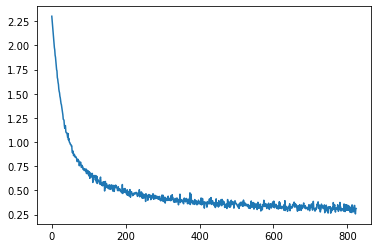

In [31]:
plt.plot(loss_list)

In [34]:
print("The loss on train data for the Adam optimizer is")
print(ses.run(loss, feed_dict={x:mnist.train.images, y_actual:mnist.train.labels}))

print("The loss on test data for the Adam optimizer is")
ses.run(loss, feed_dict={x:mnist.test.images, y_actual:mnist.test.labels})

The loss on train data for the Adam optimizer is
0.3106072
The loss on test data for the Adam optimizer is


0.30156994

In [36]:
correct_pred = tf.equal(tf.argmax(y_pred, axis=1), tf.argmax(y_actual, axis=1))
print("The correct prediction on test data is :")
ses.run(correct_pred, feed_dict={x:mnist.test.images, y_actual:mnist.test.labels})

The correct prediction on test data is :


array([ True,  True,  True, ...,  True,  True,  True])

In [37]:
accuracy = tf.reduce_mean(tf.cast(correct_pred, dtype=tf.float32))
print("The accuracy on test data is :")
ses.run(accuracy, feed_dict={x:mnist.test.images, y_actual:mnist.test.labels})

The accuracy on test data is :


0.9178

**#Summarizing everythin in one place**

In [40]:
# 1. Defining Weights and biases and input and output

w = tf.Variable(tf.ones(shape=[784,10], dtype=tf.float32))
x = tf.placeholder(dtype=tf.float32, shape= [None, 784])
b = tf.Variable(tf.ones(shape=10, dtype=tf.float32))

y_pred = tf.nn.softmax(tf.matmul(x,w)+b)
y_actual = tf.placeholder(dtype=tf.float32, shape=[None,10])

loss = tf.reduce_mean(-tf.reduce_sum(y_actual*tf.log(y_pred), axis=1))
optimizer = tf.train.AdamOptimizer().minimize(loss)

ses = tf.Session()
init = tf.global_variables_initializer()
ses.run(init)

In [42]:
from tqdm import tqdm
batch_size = 1000
n_epochs = 15

xs, train_loss, test_loss = [], [], []

for i in tqdm(range(n_epochs)):
  train_error = 0.0
  test_error = 0.0
  for j in range(int(mnist.train.num_examples/batch_size)):
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    _ ,c = ses.run([optimizer, loss], feed_dict={x:batch_x, y_actual:batch_y})
    train_error = train_error+c
    c_pred = ses.run(loss, feed_dict={x:mnist.test.images, y_actual:mnist.test.labels})
    test_error = test_error+c_pred
  
  train_loss.append(train_error)
  test_loss.append(test_error)



100%|██████████| 15/15 [00:11<00:00,  1.32it/s]


In [44]:
correct_pred = tf.equal(tf.argmax(y_pred, axis=1), tf.argmax(y_actual, axis=1))
print("The correct prediction on test data is :")
print(ses.run(correct_pred, feed_dict={x:mnist.test.images, y_actual:mnist.test.labels}))
accuracy = tf.reduce_mean(tf.cast(correct_pred, dtype=tf.float32))
print("The accuracy on test data is :")
ses.run(accuracy, feed_dict={x:mnist.test.images, y_actual:mnist.test.labels})

The correct prediction on test data is :
[ True  True  True ...  True  True  True]
The accuracy on test data is :


0.9172

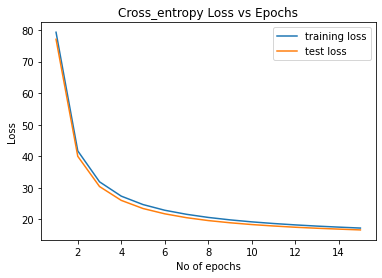

In [49]:
import matplotlib.pyplot as plt
plt.plot(range(1,16),train_loss , label = "training loss")
plt.plot(range(1,16), test_loss, label='test loss')
plt.legend()
plt.title("Cross_entropy Loss vs Epochs")
plt.xlabel("No of epochs")
plt.ylabel("Loss")
plt.show()